# Introduction

This report documents the creation and evaluation of a machine learning model designed to classify images of rooms as either clean or messy. The model uses computer vision techniques and a supervised learning approach to achieve this goal. The primary tool for image processing is OpenCV (cv2)

# importing necessary libraries

In [108]:
import numpy as np
import pandas as pd
import cv2
import os
import requests
import matplotlib.pyplot as plt

In [109]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score
import pickle
from lazypredict.Supervised import LazyClassifier

In [110]:
# to ignore warnings
import warnings
# warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#  Image Collection & Image Preprocessing

### cv2 will give us images in array format and we will store in list 

##### clean images store

In [111]:
cln_train = os.listdir("images/train/clean") #images names

In [112]:
#cln_images
cln_arr = []
for i in cln_train:
    img = cv2.imread(f"images/train/clean/{i}", 0)
    img = cv2.resize(img, (100,100)).flatten()
    cln_arr.append(img)

In [113]:
cln_arr.__len__()

96

##### we have 96 images in cln_arr

##### messy images store

In [114]:
messy_train = os.listdir("images/train/messy")

In [115]:
messy_arr = []
for i in messy_train:
    img = cv2.imread(f"images/train/messy/{i}", 0)
    img = cv2.resize(img, (100,100)).flatten()
    messy_arr.append(img)

In [116]:
messy_arr.__len__() # we have 96 messy images

96

##### all the images have same shape (100,100) means we have 10000  columns in each array(image)

In [117]:
cln_arr[0].shape

(10000,)

In [118]:
messy_arr[0].shape

(10000,)

# Creating Datafrmae

In [119]:
cln_df = pd.DataFrame(cln_arr)
messy_df = pd.DataFrame(messy_arr)

#### asigning target, if the room is messy then we will return 0 or room is clean we will return 1

In [120]:
cln_df["target"] = 1
messy_df["target"] = 0

### concat two dataframe 

In [121]:
new_df = pd.concat([cln_df, messy_df])

In [122]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,111,105,89,65,56,49,63,76,101,99,...,88,92,96,94,99,105,105,103,107,1
1,175,174,174,176,176,177,177,177,177,178,...,87,152,149,148,144,136,127,138,140,1
2,208,208,212,214,214,209,163,167,172,213,...,117,136,107,100,126,116,114,119,113,1
3,179,179,178,178,176,173,172,164,156,166,...,98,91,95,81,91,85,94,98,106,1
4,135,140,142,148,150,155,156,159,162,166,...,25,26,22,21,18,17,16,15,13,1


#### new_df is our final dataframe

# Model Training

#### data spliting

In [123]:
X = new_df.drop(columns=["target"])
y = new_df["target"]

#### applying train test split on this dataframe using stratified sampling
    stratified sampling :- ensure that the distribution of samples across different classes or categories remains representative of the population

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Model Fiting 

### Rndomforestclassifier

In [125]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [126]:
rf_acc = accuracy_score(y_test,pred)

In [127]:
print(f"we are getting {rf_acc} accuracy using random forest classifier")

we are getting 0.6458333333333334 accuracy using random forest classifier


In [128]:
rf_acc

0.6458333333333334

### XGBClassifier

In [129]:
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
xg_acc = accuracy_score(y_test, pred)

In [130]:
print(f"we are getting {xg_acc} accuracy using Xgbclassifier")

we are getting 0.6458333333333334 accuracy using Xgbclassifier


## lazyclassifier

In [132]:
lz = LazyClassifier()
models, pred = lz.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:52<00:01,  1.17s/it]

[LightGBM] [Info] Number of positive: 72, number of negative: 72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449602
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 10000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:56<00:00,  1.94s/it]


In [133]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.69,0.69,0.69,0.69,17.32
LGBMClassifier,0.69,0.69,0.69,0.69,3.95
SVC,0.67,0.67,0.67,0.67,1.24
RandomForestClassifier,0.67,0.67,0.67,0.67,1.97
XGBClassifier,0.65,0.65,0.65,0.64,2.54
DecisionTreeClassifier,0.65,0.65,0.65,0.64,1.65
GaussianNB,0.65,0.65,0.65,0.65,0.85
BernoulliNB,0.62,0.62,0.62,0.62,0.83
ExtraTreesClassifier,0.62,0.62,0.62,0.62,1.31


### we are getting best accuracy using adaboostclassifier

In [134]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
ad_acc = accuracy_score(y_test, pred)

In [135]:
ad_acc

0.6875

In [136]:
print(f"we are getting {ad_acc} accuracy using Adaboostclassifier")

we are getting 0.6875 accuracy using Adaboostclassifier


## Adaboostclassifier is our final model

### function for checking messy or clean in test dataset

In [146]:
def cln_vs_messy(i):
    img = cv2.imread(f"images/test/{i}.png", 0)
    im = cv2.imread(f"images/test/{i}.png")
    plt.imshow(im)
    plt.show()
    img = cv2.resize(img, (100,100)).flatten()
    pre = model.predict(img.reshape(1,-1))
    if pre ==1:
        print("clean".center(70,"-"))
    else:
        print("messy".center(70,"-"))

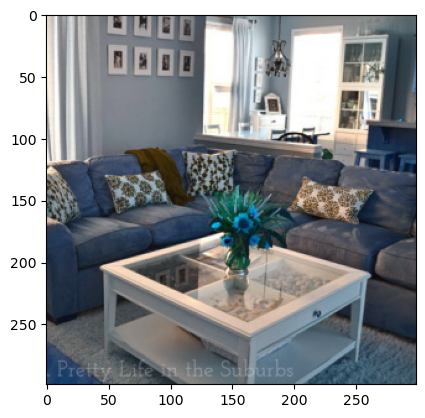

--------------------------------messy---------------------------------


In [147]:
cln_vs_messy(0)

### we have 10 images in test dataset 
runing for loop function for 10 time

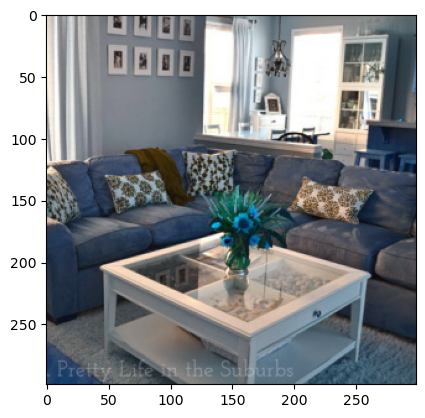

--------------------------------messy---------------------------------


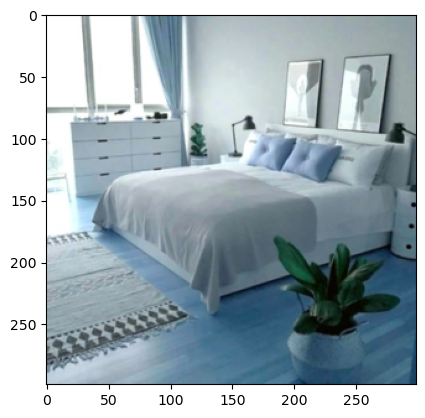

--------------------------------clean---------------------------------


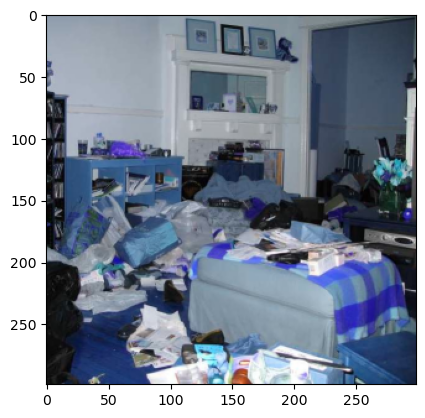

--------------------------------clean---------------------------------


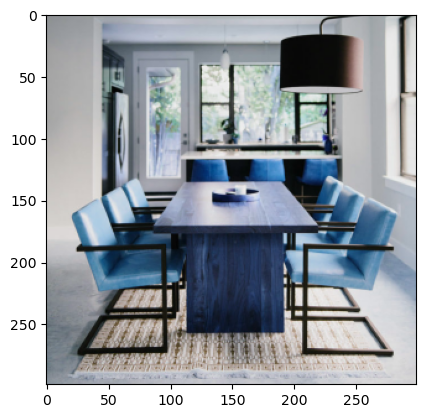

--------------------------------clean---------------------------------


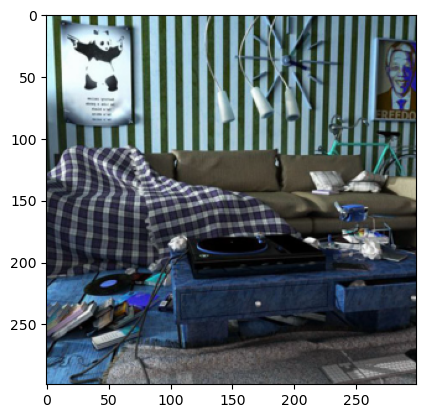

--------------------------------messy---------------------------------


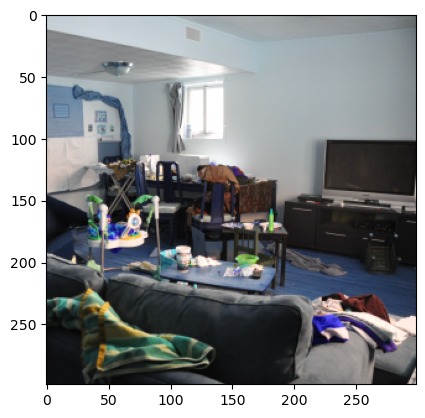

--------------------------------messy---------------------------------


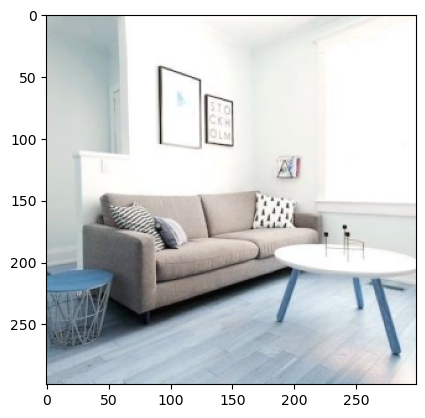

--------------------------------clean---------------------------------


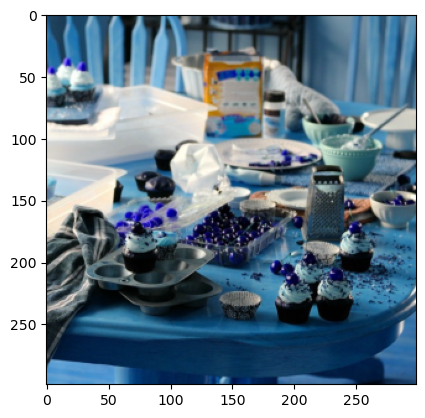

--------------------------------clean---------------------------------


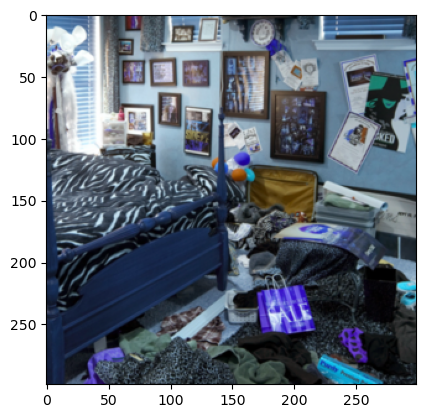

--------------------------------messy---------------------------------


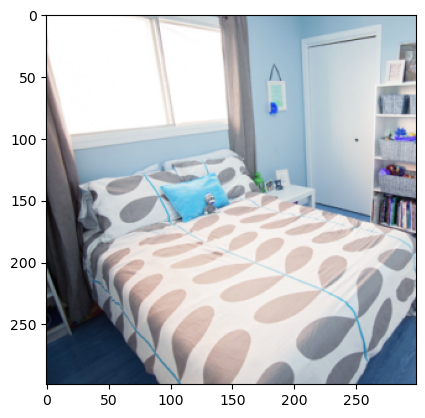

--------------------------------clean---------------------------------


In [148]:
for i in range(10):
    cln_vs_messy(i)

### saving model 

In [149]:
pickle.dump(model,open("cln_vs_messy.pickle", "wb"))

# Conclusion
This report outlines the steps taken to develop a clean and messy room prediction model using machine learning techniques. The AdaBoostClassifier achieved an acceptable level of accuracy, demonstrating its capability to distinguish between clean and messy rooms based on image data. Future improvements could include using more advanced image processing techniques and experimenting with different classifiers to enhance performance further.